### Importing the denpendencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization

### Loading the dataset

In [3]:
credit = pd.read_csv('creditcard.csv')

In [4]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit.shape

(284807, 31)

In [6]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Obesrvations 

1.We have a dataset of 284807 rows and 31 columns.
2.There are no missing values in the data.
3.Dataset is highly imbalanced {0:'Normal transaction', 1:'Fradulent transaction'}.

In [9]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [10]:
rs = RobustScaler()
credit['Amount'] = rs.fit_transform(credit['Amount'].to_numpy().reshape(-1,1))

<AxesSubplot:>

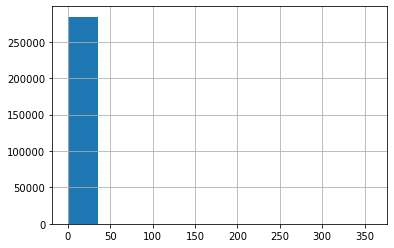

In [11]:
credit['Amount'].hist()

<AxesSubplot:>

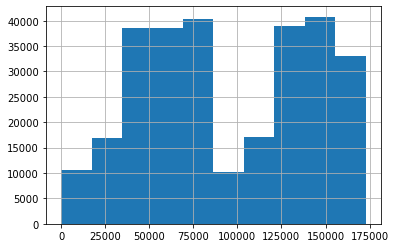

In [12]:
credit['Time'].hist()

In [13]:
mm = MinMaxScaler()
credit['Time'] = mm.fit_transform(credit['Time'].to_numpy().reshape(-1,1))

In [14]:
credit['Time'].describe()

count    284807.000000
mean          0.548717
std           0.274828
min           0.000000
25%           0.313681
50%           0.490138
75%           0.806290
max           1.000000
Name: Time, dtype: float64

In [15]:
credit = credit.sample(frac=1, random_state=1)
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


### Splitting the data  

In [16]:
train, test, val = credit[:240000], credit[240000:262000], credit[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

In [17]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [18]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

### Logistic Regression 

In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(x_val)

In [21]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22771
         1.0       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807



### Neural Network 

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
shallow_nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________


In [25]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 [==============================] - 14s 2ms/step - loss: 0.0537 - accuracy: 0.9827 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 2/5
7500/7500 [==============================] - 13s 2ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9989
Epoch 3/5
7500/7500 [==============================] - 13s 2ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9991
Epoch 4/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 5/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9990


In [27]:
(shallow_nn.predict(x_train).flatten() > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)

In [30]:
y_pred1 = neural_net_predictions(shallow_nn, x_val)

In [31]:
print(classification_report(y_val, y_pred1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22771
         1.0       0.65      0.78      0.71        36

    accuracy                           1.00     22807
   macro avg       0.83      0.89      0.85     22807
weighted avg       1.00      1.00      1.00     22807



### Random forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)

In [33]:
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22771
         1.0       0.81      0.47      0.60        36

    accuracy                           1.00     22807
   macro avg       0.90      0.74      0.80     22807
weighted avg       1.00      1.00      1.00     22807



### Gradient Boosting 

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, random_state=0)

In [37]:
print(classification_report(y_val, gbc.predict(x_val)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22771
         1.0       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807



### SVM 

In [36]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)

LinearSVC(class_weight='balanced')

In [38]:
print(classification_report(y_val, svc.predict(x_val)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22771
         1.0       0.56      0.64      0.60        36

    accuracy                           1.00     22807
   macro avg       0.78      0.82      0.80     22807
weighted avg       1.00      1.00      1.00     22807



In [39]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0


In [41]:
not_frauds = credit.query('Class == 0')
frauds = credit.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

### Handling imbalanced dataset 

In [42]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [43]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18372,0.170309,-1.762593,0.256143,1.683125,-1.279233,-1.902762,1.004210,-1.009748,-2.432546,0.458860,...,2.493579,0.320829,-0.535481,0.499401,-0.915196,-0.423434,0.107049,0.175922,2.906449,0
96341,0.380388,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1.062111,1
248296,0.890522,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1
264328,0.933932,-0.011624,0.640413,0.868046,-0.505279,0.261938,0.223098,0.239049,0.150877,0.225142,...,0.069401,0.268024,0.261459,0.683742,-1.567901,-0.816674,0.185781,0.283021,-0.272619,0
208904,0.794730,-0.679341,1.217389,-0.316778,-1.086725,0.855349,-0.980760,0.970589,0.133116,-0.357671,...,-0.083048,-0.137032,-0.238920,-0.617244,0.039020,-0.081848,0.234633,0.128382,-0.307273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81557,0.341393,-4.502731,-3.876484,1.341248,0.113400,0.189428,-0.560985,-0.140478,0.684651,0.475363,...,-0.140218,0.049411,2.313731,0.252330,0.307219,0.859051,0.184033,-0.308269,4.227625,0
276071,0.965803,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,-0.028645,1
175971,0.709373,1.972989,0.157281,-1.715078,1.207451,0.681612,-0.615282,0.601791,-0.291935,-0.132265,...,0.098640,0.467533,-0.078973,-0.371882,0.486038,-0.490665,-0.018374,-0.070911,0.075735,0
27738,0.200727,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1


### Splitting the balanced dataset 

In [45]:
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)


In [46]:
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [ ]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

### Logistic Regression 

In [48]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)

LogisticRegression()

In [49]:
print(classification_report(y_val_b, logistic_model_b.predict(x_val_b)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



### Randon forest 

In [60]:
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)

RandomForestClassifier(max_depth=2, n_jobs=-1)

In [61]:
print(classification_report(y_val_b, rf.predict(x_val_b)))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        72
           1       1.00      0.54      0.70        70

    accuracy                           0.77       142
   macro avg       0.85      0.77      0.76       142
weighted avg       0.84      0.77      0.76       142



### Gradient Boosting 

In [62]:
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=50,
                           random_state=0)

In [63]:
print(classification_report(y_val_b, gbc.predict(x_val_b)))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        72
           1       1.00      0.51      0.68        70

    accuracy                           0.76       142
   macro avg       0.84      0.76      0.74       142
weighted avg       0.84      0.76      0.75       142



### SVM 

In [64]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)

LinearSVC(class_weight='balanced')

In [65]:
print(classification_report(y_val_b, svc.predict(x_val_b)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        72
           1       1.00      0.66      0.79        70

    accuracy                           0.83       142
   macro avg       0.88      0.83      0.83       142
weighted avg       0.87      0.83      0.83       142



### Neural Networks 

In [50]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=50, callbacks=checkpoint)

Epoch 1/50
22/22 [==============================] - 2s 59ms/step - loss: 0.7669 - accuracy: 0.4186 - val_loss: 0.7038 - val_accuracy: 0.5704
Epoch 2/50
22/22 [==============================] - 1s 42ms/step - loss: 0.6889 - accuracy: 0.5757 - val_loss: 0.6600 - val_accuracy: 0.7113
Epoch 3/50
22/22 [==============================] - 1s 42ms/step - loss: 0.6412 - accuracy: 0.6757 - val_loss: 0.6470 - val_accuracy: 0.7394
Epoch 4/50
22/22 [==============================] - 1s 41ms/step - loss: 0.6300 - accuracy: 0.7129 - val_loss: 0.6370 - val_accuracy: 0.7676
Epoch 5/50
22/22 [==============================] - 1s 67ms/step - loss: 0.6207 - accuracy: 0.7257 - val_loss: 0.6270 - val_accuracy: 0.7606
Epoch 6/50
22/22 [==============================] - 1s 39ms/step - loss: 0.6109 - accuracy: 0.7386 - val_loss: 0.6160 - val_accuracy: 0.7606
Epoch 7/50
22/22 [==============================] - 1s 39ms/step - loss: 0.6000 - accuracy: 0.7486 - val_loss: 0.6041 - val_accuracy: 0.7606
Epoch 8/50
22

22/22 [==============================] - 1s 33ms/step - loss: 0.2492 - accuracy: 0.9371 - val_loss: 0.2378 - val_accuracy: 0.9366
Epoch 31/50
22/22 [==============================] - 1s 25ms/step - loss: 0.2340 - accuracy: 0.9429 - val_loss: 0.2308 - val_accuracy: 0.9296
Epoch 32/50
22/22 [==============================] - 1s 26ms/step - loss: 0.2390 - accuracy: 0.9414 - val_loss: 0.2252 - val_accuracy: 0.9296
Epoch 33/50
22/22 [==============================] - 1s 27ms/step - loss: 0.2372 - accuracy: 0.9257 - val_loss: 0.2193 - val_accuracy: 0.9296
Epoch 34/50
22/22 [==============================] - 1s 26ms/step - loss: 0.2151 - accuracy: 0.9371 - val_loss: 0.2146 - val_accuracy: 0.9296
Epoch 35/50
22/22 [==============================] - 1s 26ms/step - loss: 0.2220 - accuracy: 0.9371 - val_loss: 0.2104 - val_accuracy: 0.9296
Epoch 36/50
22/22 [==============================] - 1s 26ms/step - loss: 0.2137 - accuracy: 0.9400 - val_loss: 0.2054 - val_accuracy: 0.9296
Epoch 37/50
22/22 

In [52]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        72
           1       0.93      0.94      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142

